In [4]:
# Troubleshooting with respect to the installation
# https://julialang.org/
# https://en.wikibooks.org/wiki/Introducing_Julia/Getting_started
# https://julialang.github.io/IJulia.jl/stable/

# General video for an introduction to Julia 
# https://www.youtube.com/watch?v=8h8rQyEpiZA&t

# if you prefer to get started with a book:
# https://benlauwens.github.io/ThinkJulia.jl/latest/book.html

### Basics

In [51]:
x = [4.0, 7.0] # this is an "array"/"vector"

2-element Vector{Float64}:
 4.0
 7.0

In [48]:
m = [0 1; -1 2] # this is a "matrix"

2×2 Matrix{Int64}:
  0  1
 -1  2

In [49]:
m[:,2]

2-element Vector{Int64}:
 1
 2

In [50]:
m * x

2-element Vector{Float64}:
  7.0
 10.0

In [52]:
m .* x

2×2 Matrix{Float64}:
  0.0   4.0
 -7.0  14.0

In [14]:
m2 = [[0, 1], [-1, 0]]

2-element Vector{Vector{Int64}}:
 [0, 1]
 [-1, 0]

In [17]:
(0.0,10.0)

(0.0, 10.0)

# Blatt 0

In [19]:
u0 = [50.0,0.0] # this is an "array", first entry is h_0, second entry is v_0 
tspan = (0.0,10.0) # this is a "tuple"
g = 9.81 # this is a "floating point number"

9.81

In [20]:
# define the ordinary differential equation du = f(u,p,t) dt with parameters p
function f(u,p,t)
  dh = u[2] # second component of ODE is our velocity v
  dv = -p
  return [dh, dv]  # returns EoM
end

f(u0, g, 0.0)

2-element Vector{Float64}:
  0.0
 -9.81

In [21]:
### Question during Tutorial: What does the ! behind a function imply?
du = similar(u0)
println("Initial values: ")
@show du

function f!(du,u,p,t) # mutating
  du[1] = u[2] # second component of ODE is our velocity v, i.e., derivative of the first component du[1]
  du[2] = -p
  return nothing # function returns nothing (only modifies input)
end

f!(du, u0, g, 0.0) 
# instead of assigning the return value of the function f to du, i.e., using du = f(..)
# we mutate the elements of du inside the function f!(du, ..)

println("\nUpdated values (at t₀ = 0): ")
@show du;

Initial values: 
du = [2.433031e-314, 2.159188365e-314]

Updated values (at t₀ = 0): 
du = [0.0, -9.81]


#### Comparison of performance

In [22]:
using BenchmarkTools

In [38]:
println("f")
println(f(u0, g, 0.0))
@btime f(u0, g, 0.0)

println("\nf!")
println(f!(du, u0, g, 0.0))
@btime f!(du, u0, g, 0.0)

f
[0.0, -9.81]
  25.938 ns (1 allocation: 80 bytes)

f!
nothing
  12.470 ns (0 allocations: 0 bytes)


### Explicit Euler scheme

In [26]:
# define the step size
N = 100
dt = (tspan[2]-tspan[1])/N # Δt also possible
# create an array for the time steps
t = collect(tspan[1]:dt:tspan[2]) # ; to avoid showing t 

101-element Vector{Float64}:
  0.0
  0.1
  0.2
  0.3
  0.4
  0.5
  0.6
  0.7
  0.8
  0.9
  ⋮
  9.2
  9.3
  9.4
  9.5
  9.6
  9.7
  9.8
  9.9
 10.0

In [27]:
# initialize an empty array for the values of h
u = []
println("Initialized empty:")
println(u)

# set initial value
push!(u, u0)
println("\nAdd initial u:")
println(u)

# add all timesteps
for (i,ti) in enumerate(t[1:end-1])
  du = f(u[i],g,ti)
  # Euler step
  tmpu = u[i] + dt * du # tmp store next position
  push!(u, tmpu)
end

Initialized empty:
Any[]

Add initial u:
Any[[50.0, 0.0]]


In [28]:
u

101-element Vector{Any}:
 [50.0, 0.0]
 [50.0, -0.9810000000000001]
 [49.9019, -1.9620000000000002]
 [49.7057, -2.9430000000000005]
 [49.4114, -3.9240000000000004]
 [49.019, -4.905]
 [48.5285, -5.886]
 [47.9399, -6.867]
 [47.2532, -7.848]
 [46.4684, -8.829]
 ⋮
 [-360.6466000000003, -90.25199999999994]
 [-369.6718000000003, -91.23299999999993]
 [-378.7951000000003, -92.21399999999993]
 [-388.0165000000003, -93.19499999999992]
 [-397.3360000000003, -94.17599999999992]
 [-406.7536000000003, -95.15699999999991]
 [-416.26930000000027, -96.1379999999999]
 [-425.88310000000024, -97.1189999999999]
 [-435.59500000000025, -98.0999999999999]

In [30]:
collect(1:4)

4-element Vector{Int64}:
 1
 2
 3
 4

In [31]:
# first entry for each timestep from our list is h, second is v
h = [u[i][1] for i=1:length(u)];
v = [u[i][2] for i=1:length(u)];

In [32]:
u_mat = reduce(hcat , u)'
u_mat[:,2];

In [33]:
# load the plotting package
using Plots

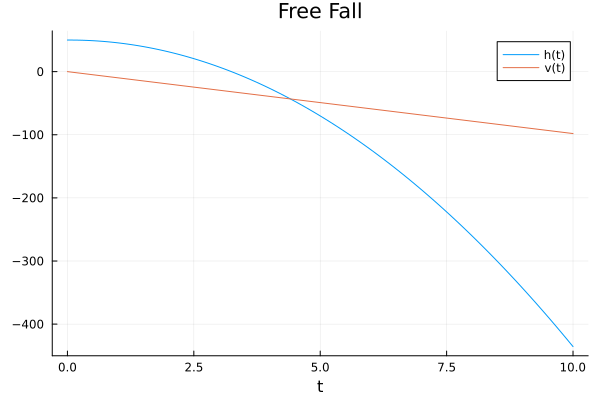

In [35]:
plt = plot(t, h, label="h(t)", title="Free Fall", xlabel="t")
plot!(plt, t, v, label="v(t)")

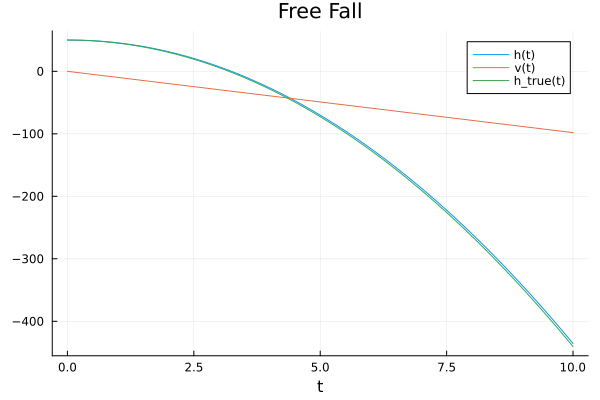

In [36]:
function hfunc(u0,t)
  h0 = u0[1]  
  v0 = u0[2]
  
  return h = h0 + t*v0 - (t^2)*g/2
end


htrue = [hfunc(u0,ti) for ti in t]

#plot!(t, (x -> hfunc(u0, x)), label="h_true(t)")
plot!(t, htrue, label="h_true(t)")

In [61]:
savefig(plt, "falling_ball.pdf") # save the figure as a png / pdf / ..

"/Users/julianarnold/Documents/Main/Teaching/Mechanik_2024/Blatt0/falling_ball.pdf"

### Newton's method
When does the ball hit the floor?

In [30]:
# derivative of the height h(t) -> v(t)
function hprimefunc(u0,t)
  h0 = u0[1]  
  v0 = u0[2]
  
  return hp = v0 - g*t
end

hprimefunc (generic function with 1 method)

In [31]:
# initial guess from plot above
tstar = 2.5

iterations = 10
for i in 1:iterations 
  tstar = tstar - hfunc(u0,tstar)/hprimefunc(u0,tstar)
end
@show tstar

tstar = 3.1927542840705048


3.1927542840705048

In [46]:
exact = (-u0[2] + sqrt(u0[2]^2+2*g*u0[1]))/g

3.1927542840705043

### Bonus: Event Handling -- solution based on the OrdinaryDiffEq package from Julia

In [37]:
using OrdinaryDiffEq,Plots

In [38]:
const gg = 9.81

9.81

In [39]:
function free_fall!(du,u,p,t)
    du[1] = u[2] # fill in the appropriate stuff
    du[2] = -p # fill in the appropriate stuff
    return nothing
end

free_fall! (generic function with 1 method)

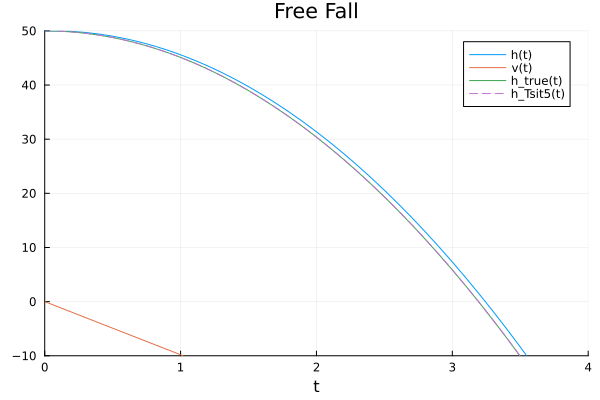

In [40]:
tspan = (0.0,4.0)
u0=[50;0]  # initial conditions
proba = ODEProblem(free_fall!,u0,tspan,gg)
sola = solve(proba,Tsit5(),reltol=1e-6)
plot!(plt, sola, idxs=(1), label="h_Tsit5(t)", ylim=(-10,u0[1]), linestyle=:dash)

In [42]:
sola.u

5-element Vector{Vector{Float64}}:
 [50.0, 0.0]
 [49.99857380993133, -0.1672777604685277]
 [49.82743100169056, -1.8400553651538045]
 [32.42791216387895, -18.567831412006573]
 [-28.479999999999563, -39.239999999999995]

In [47]:
# create a callback for stopping the simulation
function condition(u,t,integrator) # Event when event_f(u,t) == 0
    u[1]
end

function affect!(integrator) # what is the event
    terminate!(integrator) # stop the solver
end

# callback function
cb = ContinuousCallback(condition,affect!)

ContinuousCallback{typeof(condition), typeof(affect!), typeof(affect!), typeof(SciMLBase.INITIALIZE_DEFAULT), typeof(SciMLBase.FINALIZE_DEFAULT), Float64, Int64, Rational{Int64}, Nothing, Nothing, Int64}(condition, affect!, affect!, SciMLBase.INITIALIZE_DEFAULT, SciMLBase.FINALIZE_DEFAULT, nothing, SciMLBase.LeftRootFind, 10, Bool[1, 1], 1, 2.220446049250313e-15, 0, 1//100, nothing)

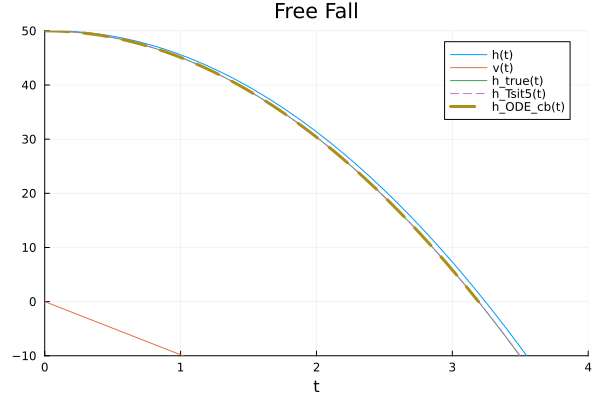

In [45]:
# solve system with terminate callback
proba = ODEProblem(free_fall!,u0,tspan,gg)
solb = solve(proba,Tsit5(),reltol=1e-6, callback=cb)
plot!(plt, solb, idxs=(1), label="h_ODE_cb(t)", xlim=(0,4), ylim=(-10,u0[1]), linestyle=:dash,linewidth=3.0)

In [73]:
solb.t

6-element Vector{Float64}:
 0.0
 0.017051759476914143
 0.18756935424605556
 1.8927453019374696
 3.192754284070511
 3.192754284070511

## Adding friction

In [61]:
function free_fall_2!(du,u,p,t)
    du[1] = u[2]
    du[2] = -p[1] - p[2] * u[2] * abs.(u[2])
end

free_fall_2! (generic function with 1 method)

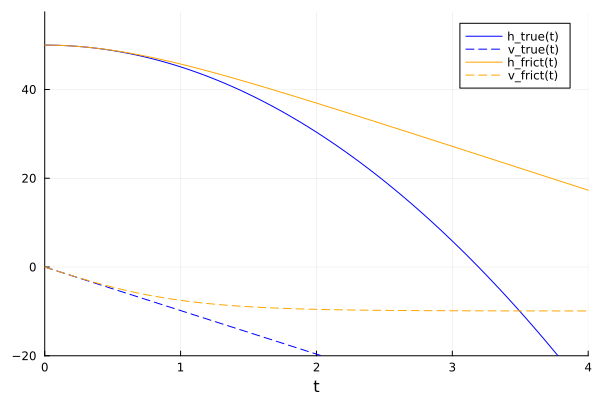

In [317]:
tspan = (0.0,4.0)
u0=[50;0]  # initial conditions
htrue = [hfunc(u0,ti) for ti in t]

probc = ODEProblem(free_fall_2!,u0,tspan,[gg 0.1])
solc = solve(probc,Tsit5(),reltol=1e-6)

plt = plot(xlabel="t", xlim=(0,4), ylim=(-20,u0[1]*1.15))
plot!(plt, t, htrue, label="h_true(t)", color=:blue)
plot!(plt, t, u0[2] .- gg*t, label="v_true(t)", color=:blue, linestyle=:dash)

plot!(plt, t, [u[1] for u in solc(t)], idxs=(1), label="h_frict(t)", color=:orange) # solc(t) interpolates
plot!(plt, t, [u[2] for u in solc(t)], idxs=(1), label="v_frict(t)", color=:orange, linestyle=:dash)

### Comparison Euler and Tsit5()

In [118]:
function free_fall!(du,u,p,t)
    du[1] = u[2] # fill in the appropriate stuff
    du[2] = -p # fill in the appropriate stuff
    return nothing
end

u0 = [50.0f0,0.0f0]
tspan = (0.0f0,10.0f0)
g = 9.81f0

probq = ODEProblem(free_fall!,u0,tspan,g)

ODEProblem with uType Vector{Float32} and tType Float32. In-place: true
timespan: (0.0f0, 10.0f0)
u0: 2-element Vector{Float32}:
 50.0
  0.0

In [124]:
solve(probq,Euler(),dt=0.01f0)
bEuler = @benchmark solve(probq,Euler(),dt=0.01f0)

BenchmarkTools.Trial: 10000 samples with 1 evaluation.
 Range (min … max):  20.083 μs … 71.916 μs  ┊ GC (min … max): 0.00% … 0.00%
 Time  (median):     22.292 μs              ┊ GC (median):    0.00%
 Time  (mean ± σ):   22.838 μs ±  2.526 μs  ┊ GC (mean ± σ):  0.00% ± 0.00%

      ▁▄▄██▅▅▃▂                                                
  ▁▂▃▅█████████▇▆▅▃▃▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁ ▂
  20.1 μs         Histogram: frequency by time        34.1 μs <

 Memory estimate: 37.95 KiB, allocs estimate: 642.

In [127]:
probq = ODEProblem(free_fall!,u0,(0.0f0,100.0f0),g)
@btime solve(probq,Euler(),dt=0.01f0)

  1.706 ms (40040 allocations: 3.09 MiB)


retcode: Success
Interpolation: 3rd order Hermite
t: 10001-element Vector{Float32}:
   0.0
   0.01
   0.02
   0.03
   0.04
   0.049999997
   0.059999995
   0.06999999
   0.07999999
   0.08999999
   ⋮
  99.922935
  99.93294
  99.94294
  99.95294
  99.962944
  99.972946
  99.98295
  99.99295
 100.0
u: 10001-element Vector{Vector{Float64}}:
 [50.0, 0.0]
 [50.0, -0.09809999780729413]
 [49.99901900004385, -0.19619999561458826]
 [49.99705700013156, -0.2942999934218824]
 [49.994114000263124, -0.3923999912291765]
 [49.99019000043854, -0.49049998903647063]
 [49.98528500065781, -0.5885999868437648]
 [49.979399000920935, -0.686699984651059]
 [49.97253200122791, -0.7847999824583531]
 [49.964684001578746, -0.8828999802656473]
 ⋮
 [-48916.6481270169, -980.2151780903148]
 [-48926.45027857871, -980.313278088122]
 [-48936.253411140475, -980.4113780859293]
 [-48946.05752470219, -980.5094780837366]
 [-48955.86261926387, -980.6075780815438]
 [-48965.6686948255, -980.7056780793511]
 [-48975.475751387086, -

In [125]:
function free_fall!(du,u,p,t)
    du[1] = u[2] # fill in the appropriate stuff
    du[2] = -p # fill in the appropriate stuff
    return nothing
end

u0 = [50.0,0.0]
tspan = (0.0,10.0)
g = 9.81

probq = ODEProblem(free_fall!,u0,tspan,g)

solve(probq,Euler(),dt=0.01)
bEuler = @benchmark solve(probq,Euler(),dt=0.01)

BenchmarkTools.Trial: 10000 samples with 1 evaluation.
 Range (min … max):  19.916 μs … 77.833 μs  ┊ GC (min … max): 0.00% … 0.00%
 Time  (median):     22.041 μs              ┊ GC (median):    0.00%
 Time  (mean ± σ):   22.538 μs ±  2.413 μs  ┊ GC (mean ± σ):  0.00% ± 0.00%

       ▅█▇▇▅▅▃                                                 
  ▂▂▃▆▇█████████▅▅▄▃▃▃▃▃▃▃▂▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▂▂▂ ▃
  19.9 μs         Histogram: frequency by time        33.7 μs <

 Memory estimate: 37.95 KiB, allocs estimate: 642.

In [126]:
probq = ODEProblem(free_fall!,u0,(0.0,100.0),g)
@btime solve(probq,Euler(),dt=0.01)

  1.829 ms (60042 allocations: 3.44 MiB)


retcode: Success
Interpolation: 3rd order Hermite
t: 10001-element Vector{Float64}:
   0.0
   0.01
   0.02
   0.03
   0.04
   0.05
   0.060000000000000005
   0.07
   0.08
   0.09
   ⋮
  99.92000000001421
  99.93000000001422
  99.94000000001422
  99.95000000001423
  99.96000000001423
  99.97000000001424
  99.98000000001424
  99.99000000001425
 100.0
u: 10001-element Vector{Vector{Float64}}:
 [50.0, 0.0]
 [50.0, -0.0981]
 [49.999019, -0.1962]
 [49.997057, -0.2943]
 [49.994113999999996, -0.3924]
 [49.99019, -0.49050000000000005]
 [49.985285, -0.5886]
 [49.979399, -0.6867]
 [49.972532, -0.7847999999999999]
 [49.964684, -0.8828999999999999]
 ⋮
 [-48916.65031600218, -980.2152000001698]
 [-48926.452468002186, -980.3133000001699]
 [-48936.25560100219, -980.4114000001699]
 [-48946.059715002186, -980.50950000017]
 [-48955.86481000219, -980.60760000017]
 [-48965.67088600219, -980.70570000017]
 [-48975.47794300219, -980.8038000001701]
 [-48985.28598100219, -980.9019000001701]
 [-48995.094999988214

In [128]:
function free_fall!(du,u,p,t)
    du[1] = u[2] # fill in the appropriate stuff
    du[2] = -p # fill in the appropriate stuff
    return nothing
end

u0 = [50.0f0,0.0f0]
tspan = (0.0f0,10.0f0)
g = 9.81f0

probq = ODEProblem(free_fall!,u0,tspan,g)
bRK4 = @benchmark solve(probq,RK4(),reltol=1e-6);

In [77]:
bRK4

BenchmarkTools.Trial: 10000 samples with 9 evaluations.
 Range (min … max):  2.681 μs …  20.091 ms  ┊ GC (min … max):  0.00% … 99.96%
 Time  (median):     3.032 μs               ┊ GC (median):     0.00%
 Time  (mean ± σ):   5.203 μs ± 200.925 μs  ┊ GC (mean ± σ):  38.59% ±  1.00%

       ▁▂▄▅▅█▃▃                                                
  ▁▂▃▆▇█████████▆▆▄▄▃▃▃▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁ ▂
  2.68 μs         Histogram: frequency by time         4.7 μs <

 Memory estimate: 6.28 KiB, allocs estimate: 72.

In [129]:
function free_fall!(du,u,p,t)
    du[1] = u[2] # fill in the appropriate stuff
    du[2] = -p # fill in the appropriate stuff
    return nothing
end

u0 = [50.0f0,0.0f0]
tspan = (0.0f0,10.0f0)
g = 9.81f0

probq = ODEProblem(free_fall!,u0,tspan,g)
bT5 = @benchmark solve(probq,Tsit5(),reltol=1e-6);

In [130]:
bT5

BenchmarkTools.Trial: 10000 samples with 1 evaluation.
 Range (min … max):  13.541 μs … 66.250 μs  ┊ GC (min … max): 0.00% … 0.00%
 Time  (median):     15.125 μs              ┊ GC (median):    0.00%
 Time  (mean ± σ):   16.023 μs ±  3.898 μs  ┊ GC (mean ± σ):  0.00% ± 0.00%

  ▂▆██▇▇▅▄▃▂▂▂▂▁▁▁▁▁                                          ▂
  █████████████████████▇▇▆▇▆▆▇▅▇▆▆▆▆▅▅▅▁▅▅▆▄▅▅▃▅▅▅▅▆▅▅▃▅▅▄▆▆▆ █
  13.5 μs      Histogram: log(frequency) by time      38.1 μs <

 Memory estimate: 25.20 KiB, allocs estimate: 602.

## Conversion to Matrix

In [176]:
solc.u

27-element Vector{Vector{Float64}}:
 [50.0, 0.0]
 [49.99857387772675, -0.1672618576242578]
 [49.98570357012454, -0.529240330053925]
 [49.948672964927866, -1.0009421810452577]
 [49.8706171874499, -1.5830124902678813]
 [49.72923019780363, -2.2740313996809474]
 [49.49737098781177, -3.063022956666935]
 [49.140280693691025, -3.9366490838928723]
 [48.60561317786131, -4.886136847748946]
 [47.71199411106195, -6.001861313111557]
 ⋮
 [35.12520222112347, -9.648421634391028]
 [33.191169114488005, -9.731314375478618]
 [31.130684079124922, -9.79016378904115]
 [28.92862247776423, -9.831061985178513]
 [26.566907332833868, -9.858789388269287]
 [24.022733041337027, -9.877061991994372]
 [21.268252274442403, -9.888711851197336]
 [18.268854974499593, -9.895857293797667]
 [17.309673647114078, -9.897374248889548]

In [186]:
reduce(hcat, solc.u)

2×27 Matrix{Float64}:
 50.0  49.9986    49.9857   49.9487   …  21.2683   18.2689   17.3097
  0.0  -0.167262  -0.52924  -1.00094     -9.88871  -9.89586  -9.89737